In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_1361.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_4264.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_7985.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_2060.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_9645.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_555.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_2729.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_9745.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_4115.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_7071.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_9367.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_4610.png
/kaggle/input/doodle-augmente

In [2]:
import os
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.metrics import Precision, Accuracy, AUC, Recall
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
# Set the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define constants
image_size = (224, 224)
batch_size = 32
num_classes = 20
train_dir = '/kaggle/input/doodle-augmented-data/AugData/train'
val_dir = '/kaggle/input/doodle-augmented-data/AugData/val'
test_dir = '/kaggle/input/doodle-augmented-data/AugData/test'


# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    fill_mode='nearest'

)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    fill_mode='nearest'
    
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and split the data into train and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

Found 3991 images belonging to 20 classes.
Found 562 images belonging to 20 classes.
Found 1164 images belonging to 20 classes.


In [4]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the custom CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

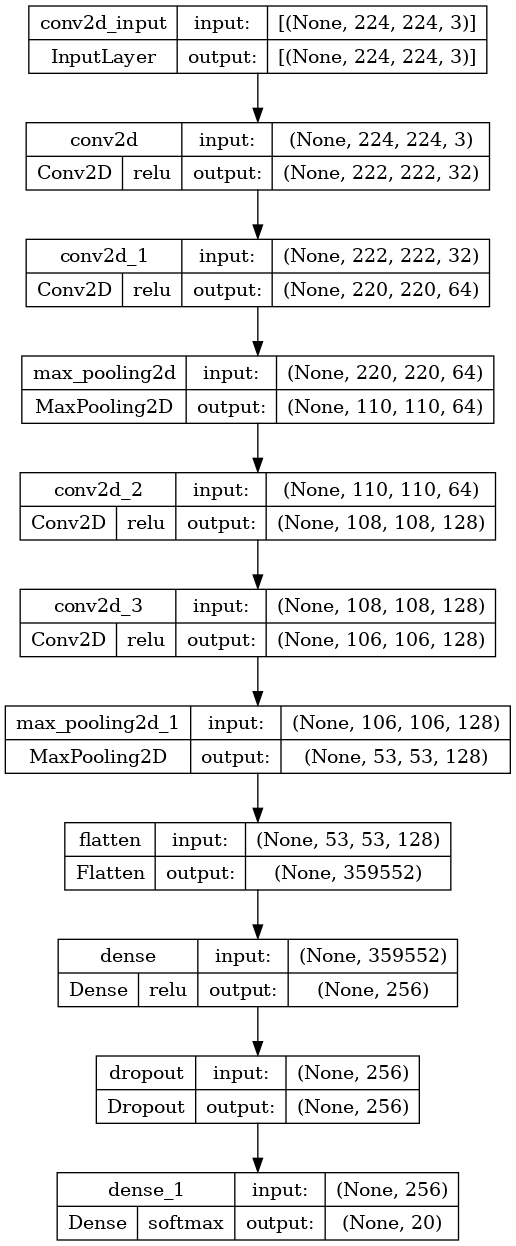

In [5]:
keras.utils.plot_model(model,show_shapes=True,show_layer_activations=True)

In [6]:
# Define early stopping
early_stopping = EarlyStopping(patience=3, monitor='val_loss',restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size,
    epochs=50,
    callbacks=[early_stopping])

Epoch 1/50
124/124 [==============================] - 83s 584ms/step - loss: 2.9771 - accuracy: 0.1708 - val_loss: 2.1898 - val_accuracy: 0.3474
Epoch 2/50
124/124 [==============================] - 68s 545ms/step - loss: 2.0994 - accuracy: 0.3718 - val_loss: 1.7294 - val_accuracy: 0.4651
Epoch 3/50
124/124 [==============================] - 65s 526ms/step - loss: 1.6959 - accuracy: 0.4996 - val_loss: 1.9080 - val_accuracy: 0.4173
Epoch 4/50
124/124 [==============================] - 67s 541ms/step - loss: 1.4765 - accuracy: 0.5681 - val_loss: 1.3394 - val_accuracy: 0.5882
Epoch 5/50
124/124 [==============================] - 66s 532ms/step - loss: 1.1579 - accuracy: 0.6474 - val_loss: 0.9961 - val_accuracy: 0.6893
Epoch 6/50
124/124 [==============================] - 69s 556ms/step - loss: 1.0118 - accuracy: 0.6966 - val_loss: 0.9391 - val_accuracy: 0.7132
Epoch 7/50
124/124 [==============================] - 68s 543ms/step - loss: 1.0117 - accuracy: 0.7017 - val_loss: 0.9275 - val_ac

[]

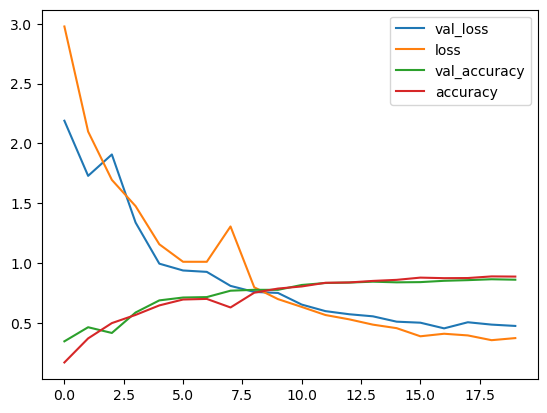

In [7]:
# Printing the metrics
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()
plt.plot()

In [10]:
model.evaluate_generator(test_generator,verbose=1)

37/37 [==============================] - 3s 86ms/step - loss: 0.3160 - accuracy: 0.9141


[0.3160165250301361, 0.9140893220901489]

In [9]:
model.save('/kaggle/working/custom_cnn.h5')